# 601 逻辑回归与绘制决策边界
### 逻辑回归 Logistic Regression：
解决分类问题且主要二分类问题
<img src='./image/6.png' style='zoom:75%'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def sigmoid(t):
    return 1./(1.+ np.exp(-t))

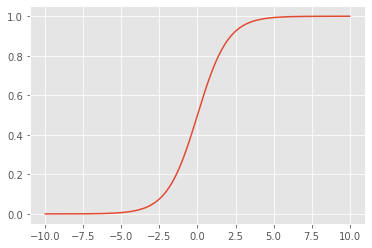

In [3]:
x = np.linspace(-10, 10, 500)

plt.plot(x, sigmoid(x))

### 逻辑回归的损失函数
$$cost=-ylog(\hat{p})-(1-y)log(1-\hat{p})$$
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^my^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})$$
$$\hat{p}^{(i)}=\delta(X_b^{(i)}\theta)=\frac{1}{1+e^{-X_b^{(i)}\theta}}$$
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^my^{(i)}log(\delta(X_b^{(i)}\theta))log(1-\delta(X_b^{(i)}\theta))$$

### 逻辑回归损失函数导数
$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}(\delta(X_b^{(i)}\theta)-y^{(i)})X_j^{(i)}=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})X_j^{(i)}$$
$$\nabla J(\theta)=\frac{1}{m}\cdot X_b^T \cdot (\delta(X_b\theta)-y)$$

## 实现逻辑回归
代码参见 [这里](./code/playML/LogisticRegression.py)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


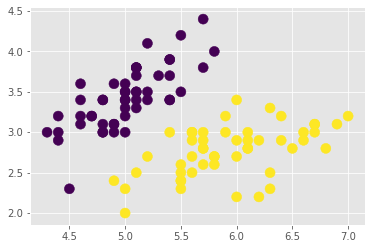

In [6]:
plt.scatter(X[:,0],X[:,1],c=y, s=100)

### 使用逻辑回归

In [7]:
import sys
sys.path.insert(0,'./code')
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [8]:
import sys
sys.path.insert(0,'./code')
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
log_reg.score(X_test, y_test)

1.0

In [10]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [11]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [12]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

### 决策边界 Decision Boundary
$$\theta^T \cdot x_b=0$$
$$x_2=\frac{-\theta_0-\theta_1x_1}{\theta_2}$$

In [13]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

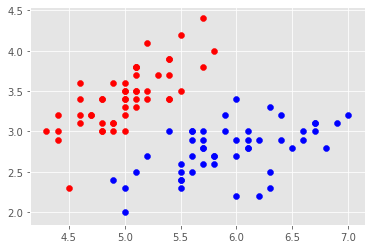

In [14]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")

In [15]:
import sys
sys.path.insert(0,'./code')
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [16]:
import sys
sys.path.insert(0,'./code')
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [18]:
log_reg.intercept_

-0.6937719272911228

In [19]:
def x2(x1):
    return (-log_reg.coef_[0] * x1-log_reg.intercept_) / log_reg.coef_[1]

In [20]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

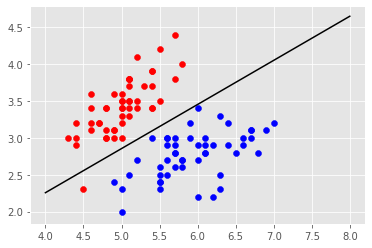

In [21]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot, color = 'black')

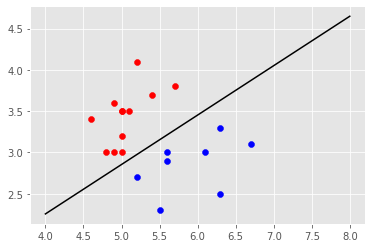

In [22]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot,color='black')

### 决策边界绘制函数

In [23]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

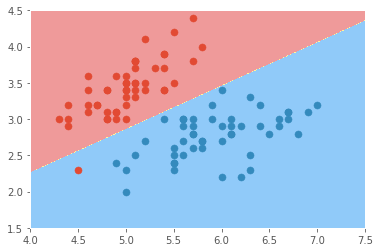

In [24]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1],s=50)
plt.scatter(X[y==1,0], X[y==1,1],s=50)

### kNN的决策边界

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
knn_clf.score(X_test, y_test)

1.0

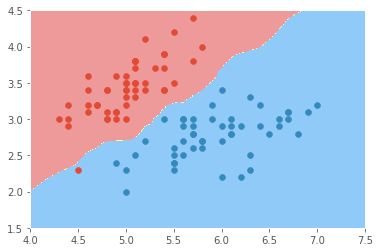

In [27]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [28]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 从决策边界可以看出来出现了过拟合现象，没有很好的泛化

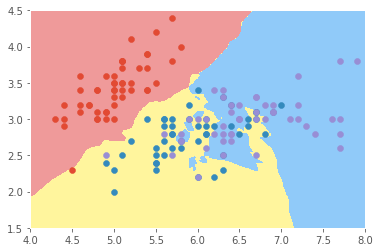

In [29]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])

#### 具有很好的泛化，但是准确度不高

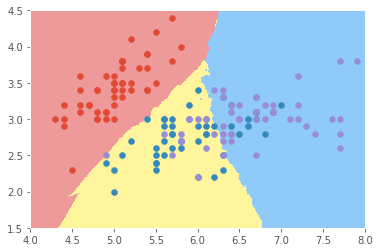

In [30]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])